In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv('C:/Users/11702/Desktop/Kaggle/EM_data-master/heros.csv', encoding = 'gbk')

#to show all the columns
pd.set_option('display.max_columns', None)
data

,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,159,397,21.14,101,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,164,409,22.07,100,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,张飞,8341,329.4,3450,100,0,100,301,10.570,153,504,27.07,125,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,牛魔,8476,352.8,3537,1926,104,470,273,8.357,156,394,20.36,109,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,吕布,7344,270.0,3564,0,0,0,343,12.360,170,390,20.79,99,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,阿轲,5968,192.8,3269,0,0,0,427,17.860,177,349,18.57,89,81,2.214,50,0,0.000,0,28.00%,近战,刺客,NaN
65,娜可露露,6205,211.9,3239,1808,97,450,385,15.140,173,359,19.50,86,79,2.286,47,38,1.571,16,14.00%,近战,刺客,NaN
66,兰陵王,6232,210.0,3292,1822,98,450,388,15.500,171,342,18.36,85,99,3.357,52,46,1.929,19,14.00%,近战,刺客,NaN
67,铠,6700,237.5,3375,1784,96,440,328,10.860,176,388,20.07,107,81,2.643,44,38,1.571,16,28.00%,近战,战士,坦克


In [63]:
data.describe()

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,6580.478261,241.582609,3218.739130,1475.086957,78.753623,372.536232,329.884058,11.687072,166.275362,376.478261,19.868986,98.318841,86.014493,2.752551,47.478261,32.768116,1.309464,14.434783
std,1011.220689,63.662144,190.120059,731.466853,40.405811,168.365025,41.569055,2.720526,7.494869,54.373060,3.146359,13.675324,17.180266,0.835609,6.055160,15.312572,0.676027,8.710167
min,5037.000000,155.500000,2860.000000,0.000000,0.000000,0.000000,263.000000,7.857000,152.000000,295.000000,14.570000,83.000000,63.000000,1.714000,36.000000,0.000000,0.000000,0.000000
25%,5725.000000,190.500000,3083.000000,1694.000000,91.000000,420.000000,295.000000,9.357000,161.000000,336.000000,17.360000,89.000000,71.000000,2.071000,44.000000,36.000000,1.500000,15.000000
50%,6232.000000,235.100000,3225.000000,1770.000000,95.000000,440.000000,321.000000,11.000000,166.000000,361.000000,19.140000,95.000000,81.000000,2.643000,47.000000,38.000000,1.571000,16.000000
75%,7176.000000,280.500000,3364.000000,1926.000000,104.000000,470.000000,361.000000,13.360000,171.000000,400.000000,22.070000,101.000000,98.000000,3.357000,52.000000,42.000000,1.714000,17.000000
max,9328.000000,412.100000,3622.000000,2016.000000,109.000000,490.000000,427.000000,17.860000,188.000000,514.000000,27.290000,150.000000,128.000000,4.929000,59.000000,50.000000,1.929000,50.000000


In [64]:
#check for NA
data.isnull().any(axis = 0)

英雄         False
最大生命       False
生命成长       False
初始生命       False
最大法力       False
法力成长       False
初始法力       False
最高物攻       False
物攻成长       False
初始物攻       False
最大物防       False
物防成长       False
初始物防       False
最大每5秒回血    False
每5秒回血成长    False
初始每5秒回血    False
最大每5秒回蓝    False
每5秒回蓝成长    False
初始每5秒回蓝    False
最大攻速       False
攻击范围       False
主要定位       False
次要定位        True
dtype: bool

In [65]:
#data manipulation
data['最大攻速'] = data['最大攻速'].apply(lambda x: float(x.strip('%'))/100)

#then we map 远程/近战 with 1/0
data['攻击范围'] = data['攻击范围'].map({'远程':1,'近战':0})

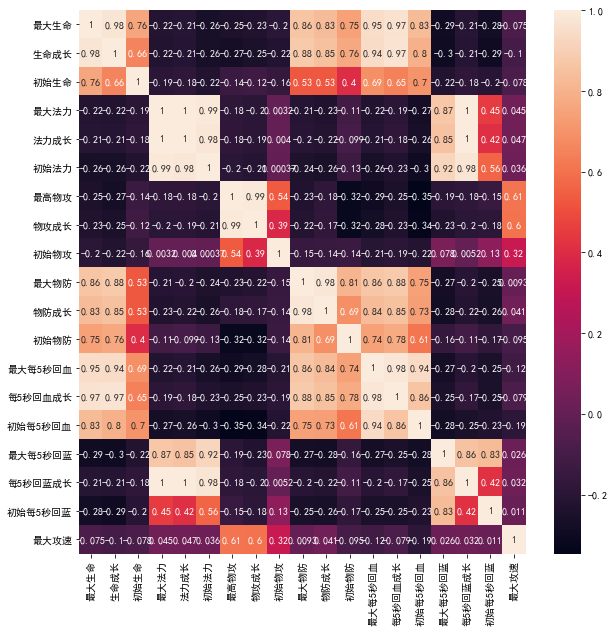

In [66]:
feature = list(data.columns[1:20])

#set plt to show the Chiniese correctly
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,10))
cor = data[feature].corr()
sns.heatmap(cor,annot = True)
plt.show()

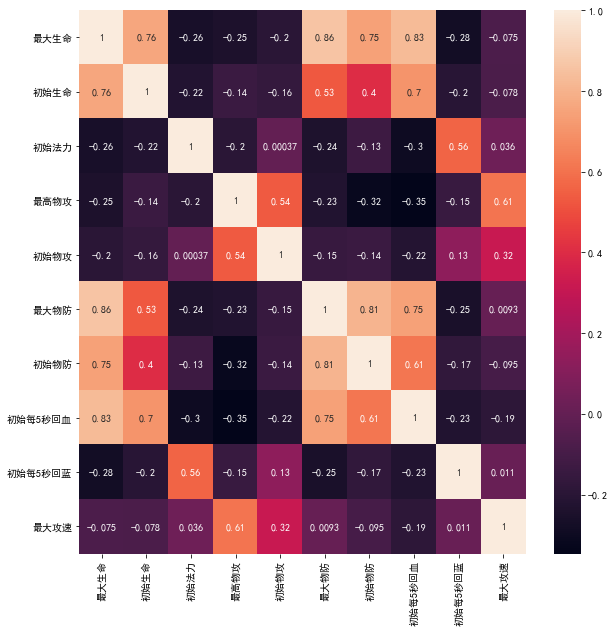

In [67]:
#as we can see , '最大生命' has high covariance with '每5秒回血成长',
#'最大每5秒回血','生命成长', then we choose to use '最大生命'.
#And '初始法力' has high covariance with '最大法力', '法力成长',
#'最大每5秒回蓝','每5秒回蓝成长', we choose to use '初始法力'.
#And '物攻成长' has high covariance with '最高物攻'，
#we choose to use '最高物攻'.
#And '物防成长' has high covariance with '最高物防'，
#we choose to use '最高物防'.

feature.remove('每5秒回血成长')
feature.remove('最大每5秒回血')
feature.remove('生命成长')
feature.remove('最大法力')
feature.remove('法力成长')
feature.remove('最大每5秒回蓝')
feature.remove('每5秒回蓝成长')
feature.remove('物攻成长')
feature.remove('物防成长')

plt.figure(figsize = (10,10))
cor = data[feature].corr()
sns.heatmap(cor,annot = True)
plt.show()

In [69]:
#normalization
ss = StandardScaler()
data_train = ss.fit_transform(data[feature])

In [70]:
gmm = GaussianMixture(n_components = 4,covariance_type = 'full')
gmm.fit(data_train)
prediction = gmm.predict(data_train)
prediction

array([1, 0, 1, 1, 3, 3, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 3, 3, 1, 3, 2,
       2, 2, 2], dtype=int64)

In [71]:
data['type'] = prediction
data

,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位,type
0,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,159,397,21.14,101,98,3.357,51,37,1.571,15,0.28,0,坦克,战士,1
1,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,164,409,22.07,100,92,3.143,48,37,1.571,15,0.14,0,战士,坦克,0
2,张飞,8341,329.4,3450,100,0,100,301,10.570,153,504,27.07,125,115,4.143,57,5,0.000,5,0.14,0,坦克,辅助,1
3,牛魔,8476,352.8,3537,1926,104,470,273,8.357,156,394,20.36,109,117,4.214,58,42,1.786,17,0.14,0,坦克,辅助,1
4,吕布,7344,270.0,3564,0,0,0,343,12.360,170,390,20.79,99,97,3.071,54,0,0.000,0,0.14,0,战士,坦克,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,阿轲,5968,192.8,3269,0,0,0,427,17.860,177,349,18.57,89,81,2.214,50,0,0.000,0,0.28,0,刺客,NaN,3
65,娜可露露,6205,211.9,3239,1808,97,450,385,15.140,173,359,19.50,86,79,2.286,47,38,1.571,16,0.14,0,刺客,NaN,2
66,兰陵王,6232,210.0,3292,1822,98,450,388,15.500,171,342,18.36,85,99,3.357,52,46,1.929,19,0.14,0,刺客,NaN,2
67,铠,6700,237.5,3375,1784,96,440,328,10.860,176,388,20.07,107,81,2.643,44,38,1.571,16,0.28,0,战士,坦克,2
